<a href="https://colab.research.google.com/github/Anju15Chauhan/AirBnB/blob/main/AnjuChauhan_Retail_Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Capstone Projecton Retail done by ANJU CHAUHAN**

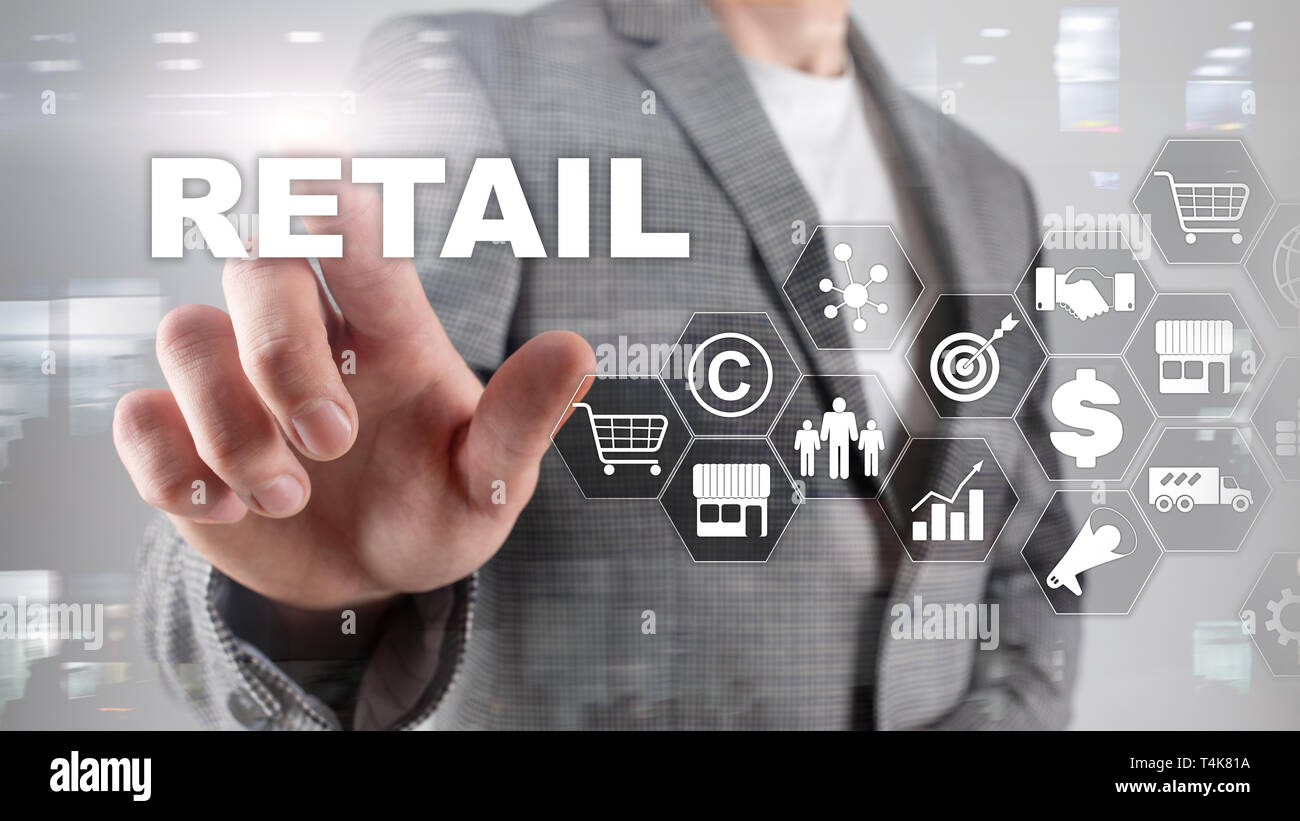

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data
features_data = pd.read_csv('Features data set.csv')
sales_data = pd.read_csv('sales data-set.csv')
stores_data = pd.read_csv('stores data-set.csv')

# **1. Data Exploration and Cleaning**

In [ ]:
#Task 1: Load the dataset into a pandas DataFrame and display the first few rows
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
# Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.
features_data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
# missing value
features_data.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [ ]:
#  Task 3: Identify and handle missing values. Explain the chosen method for handling them.

# Fill missing values in MarkDown1-5 with 0
features_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = features_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)


# Forward fill for CPI and Unemployment
features_data['CPI'] = features_data['CPI'].fillna(method='ffill')
features_data['Unemployment'] = features_data['Unemployment'].fillna(method='ffill')

# Check if all missing values are handled
print("Missing values in Features dataset:")
print(features_data.isnull().sum())


Missing values in Features dataset:
Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [ ]:
# Task 4: Identify and handle duplicate rows if any.

# Check for duplicate rows
duplicates_features = features_data.duplicated().sum()
duplicates_sales = sales_data.duplicated().sum()
duplicates_stores = stores_data.duplicated().sum()

print(f"Duplicate rows in Features dataset: {duplicates_features}")
print(f"Duplicate rows in Sales dataset: {duplicates_sales}")
print(f"Duplicate rows in Stores dataset: {duplicates_stores}")

# Drop duplicate rows
features_data_cleaned = features_data.drop_duplicates()
sales_data_cleaned = sales_data.drop_duplicates()
stores_data_cleaned = stores_data.drop_duplicates()

# Verify that duplicates were removed
print(f"Features dataset shape after removing duplicates: {features_data_cleaned.shape}")
print(f"Sales dataset shape after removing duplicates: {sales_data_cleaned.shape}")
print(f"Stores dataset shape after removing duplicates: {stores_data_cleaned.shape}")


Duplicate rows in Features dataset: 0
Duplicate rows in Sales dataset: 0
Duplicate rows in Stores dataset: 0
Features dataset shape after removing duplicates: (8190, 12)
Sales dataset shape after removing duplicates: (421570, 5)
Stores dataset shape after removing duplicates: (45, 3)


In [ ]:
# Task 5: Convert categorical variables to numerical values using appropriate encoding techniques (e.g., one-hot encoding, label encoding)

# Load datasets
features_data = pd.read_csv('Features data set.csv')
stores_data = pd.read_csv('stores data-set.csv')

# One-Hot Encoding for the 'IsHoliday' column in Features dataset
features_data = pd.get_dummies(features_data, columns=['IsHoliday'], drop_first=True)

# One-Hot Encoding for the 'Type' column in Stores dataset
stores_data = pd.get_dummies(stores_data, columns=['Type'], drop_first=True)

# Display the first few rows to verify
print("Features dataset after One-Hot Encoding:")
print(features_data.head())

print("Stores dataset after One-Hot Encoding:")
print(stores_data.head())



Features dataset after One-Hot Encoding:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday_True  
0        NaN        NaN        NaN  211.096358         8.106           False  
1        NaN        NaN        NaN  211.242170         8.106            True  
2        NaN        NaN        NaN  211.289143         8.106           False  
3        NaN        NaN        NaN  211.319643         8.106           False  
4        NaN        NaN        NaN  211.350143         8.106           False  
Stores dataset after One-Hot Encoding:
   Store    Size  T

**Explanation:**

**IsHoliday in the Features Dataset:** This is binary, so One-Hot Encoding will create one column (IsHoliday_True), where 1 represents a holiday and 0 represents a non-holiday.

**Type in the Stores Dataset:** This will create separate columns for each store type (Type_A, Type_B, etc.).

# **2. Data Visualization**

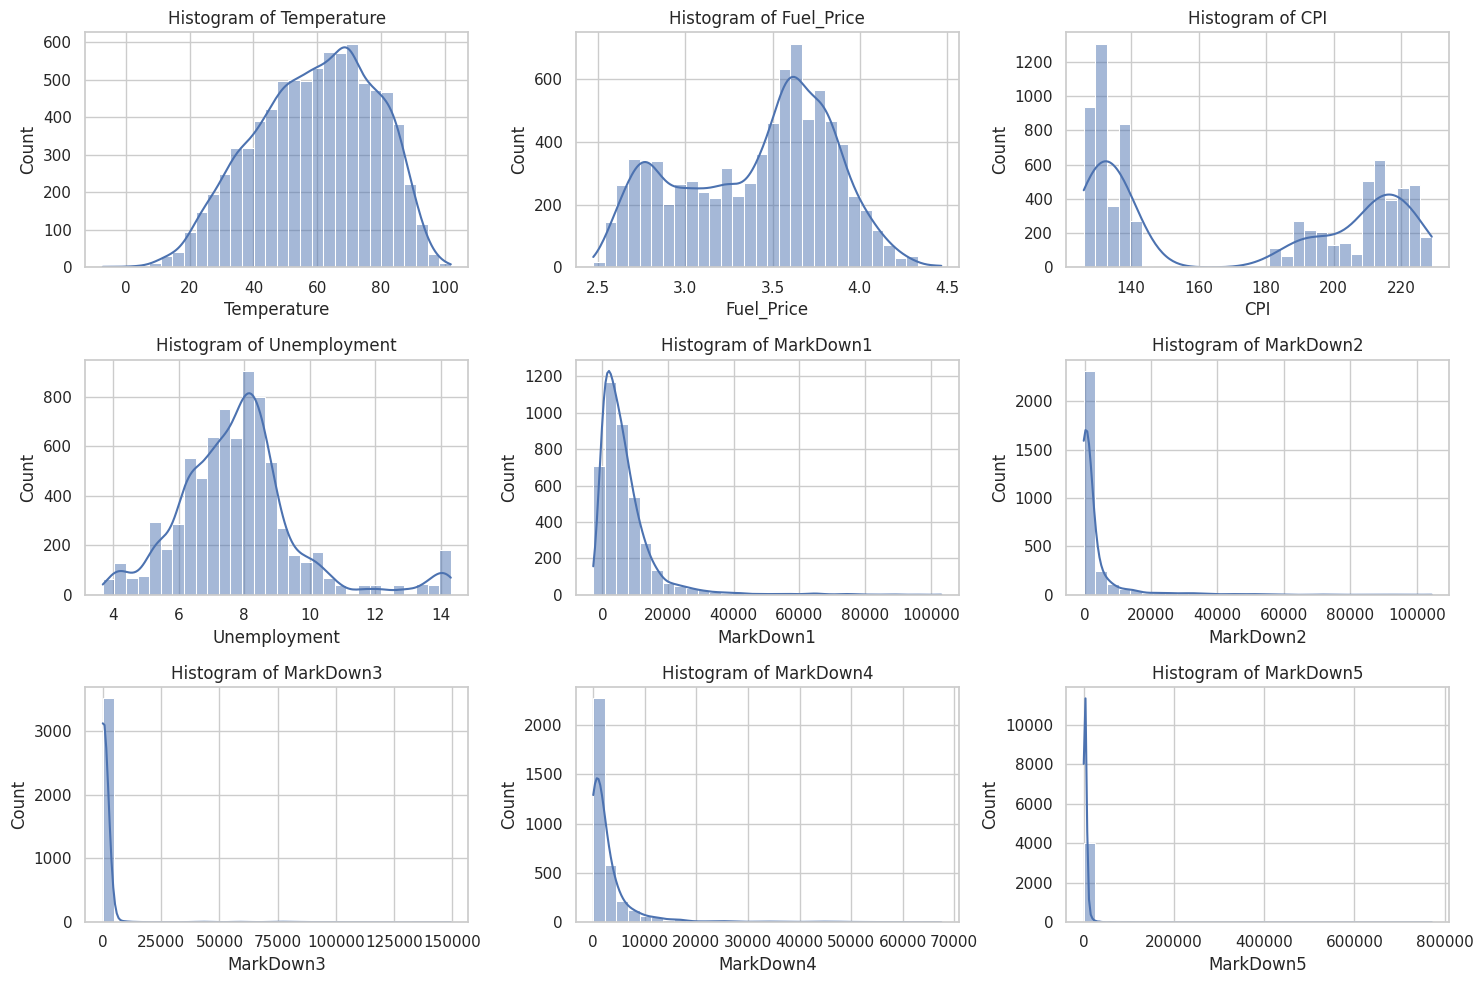

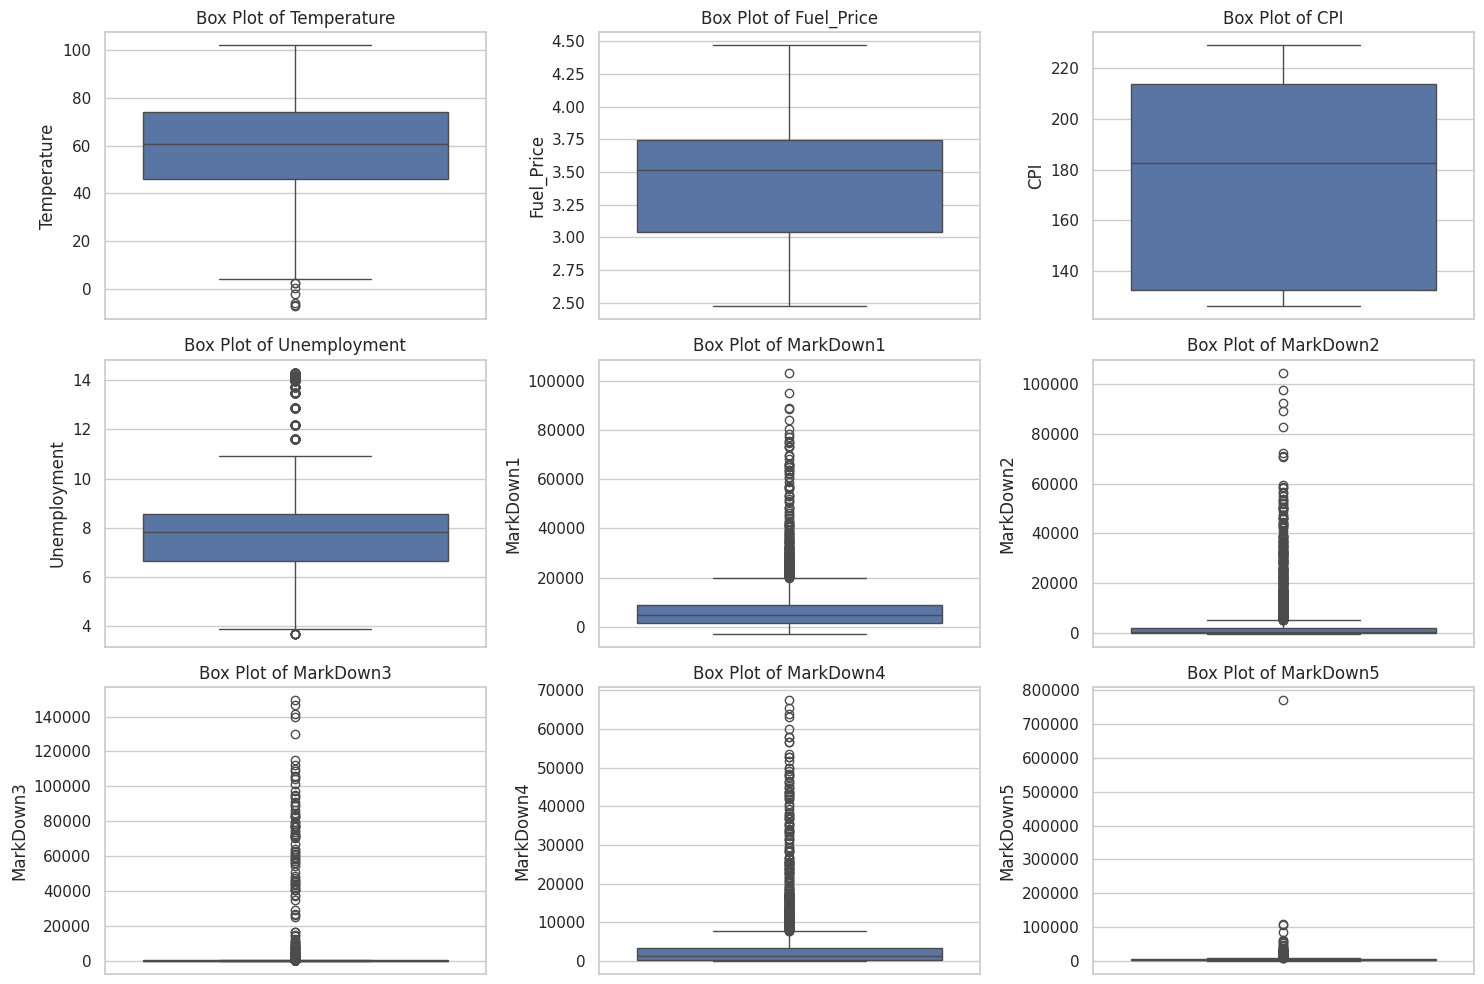

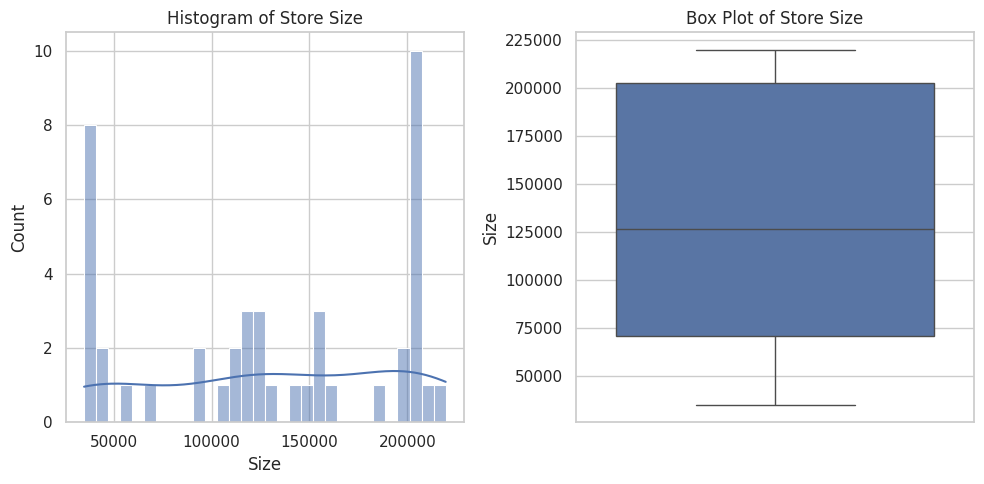

In [ ]:
# Task 6: Create visualizations to understand the distribution of numerical features (e.g.,histograms, box plots).

# Load datasets
features_data = pd.read_csv('Features data set.csv')
stores_data = pd.read_csv('stores data-set.csv')

# Configure plot style
sns.set(style="whitegrid")

# List of numerical columns in Features Dataset
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Histograms for numerical features in Features Dataset
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(features_data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Box Plots for numerical features in Features Dataset
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=features_data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Visualization for the Size column in the Stores Dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(stores_data['Size'], bins=30, kde=True)
plt.title('Histogram of Store Size')

plt.subplot(1, 2, 2)
sns.boxplot(y=stores_data['Size'])
plt.title('Box Plot of Store Size')
plt.tight_layout()
plt.show()


**Explanation:**

**1.**Histograms with Kernel Density Estimation (KDE) give a smooth representation of data distribution for each numerical feature.

**2.**Box Plots highlight data spread and potential outliers, helping to spot any unusual values.

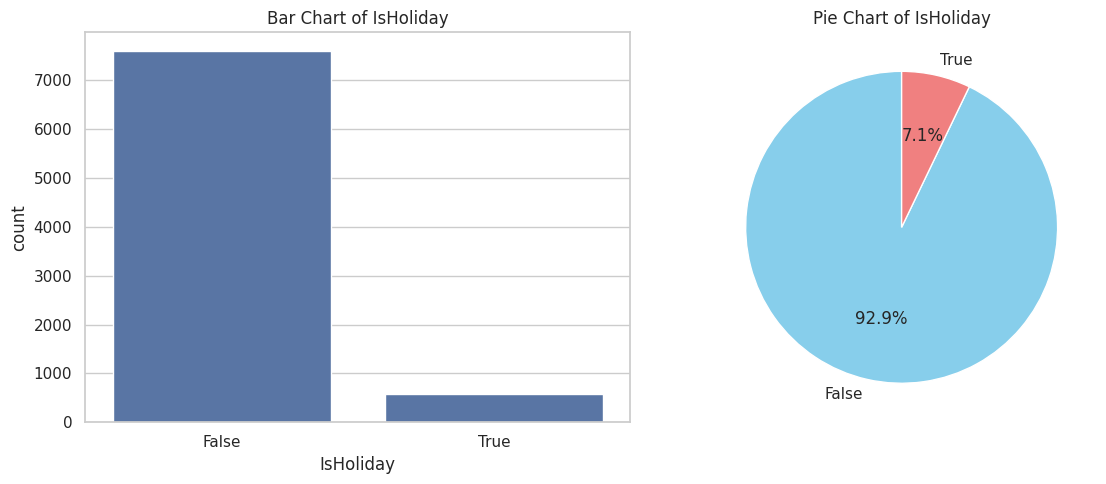

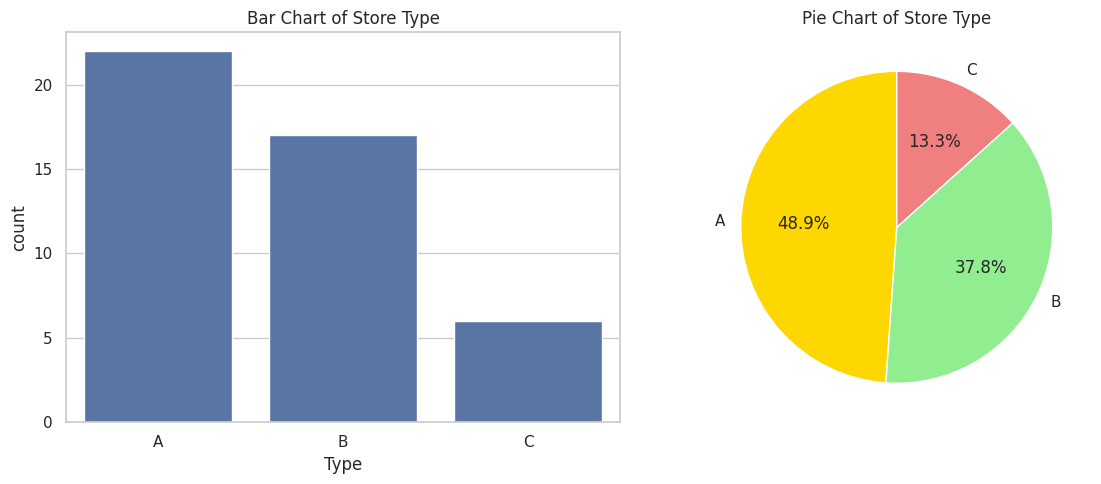

In [ ]:
# Task 7: Create visualizations for categorical features (e.g., bar charts, pie charts).

# load data set
features_data = pd.read_csv('Features data set.csv')
stores_data = pd.read_csv('stores data-set.csv')

# Configure plot style
sns.set(style="whitegrid")

# Visualization for 'IsHoliday' in Features Dataset
plt.figure(figsize=(12, 5))

# Bar Chart
plt.subplot(1, 2, 1)
sns.countplot(x='IsHoliday', data=features_data)
plt.title('Bar Chart of IsHoliday')

# Pie Chart
plt.subplot(1, 2, 2)
features_data['IsHoliday'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart of IsHoliday')
plt.ylabel('')  # Hide the y-axis label for pie chart

plt.tight_layout()
plt.show()

# Visualization for 'Type' in Stores Dataset
plt.figure(figsize=(12, 5))

# Bar Chart
plt.subplot(1, 2, 1)
sns.countplot(x='Type', data=stores_data)
plt.title('Bar Chart of Store Type')

# Pie Chart
plt.subplot(1, 2, 2)
stores_data['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('Pie Chart of Store Type')
plt.ylabel('')  # Hide the y-axis label for pie chart

plt.tight_layout()
plt.show()




**Explanation:**

**Bar Chart:** Shows the count of each category, making it easy to compare the frequency.

**Pie Chart:** Displays the proportion of each category, giving a quick view of relative sizes.

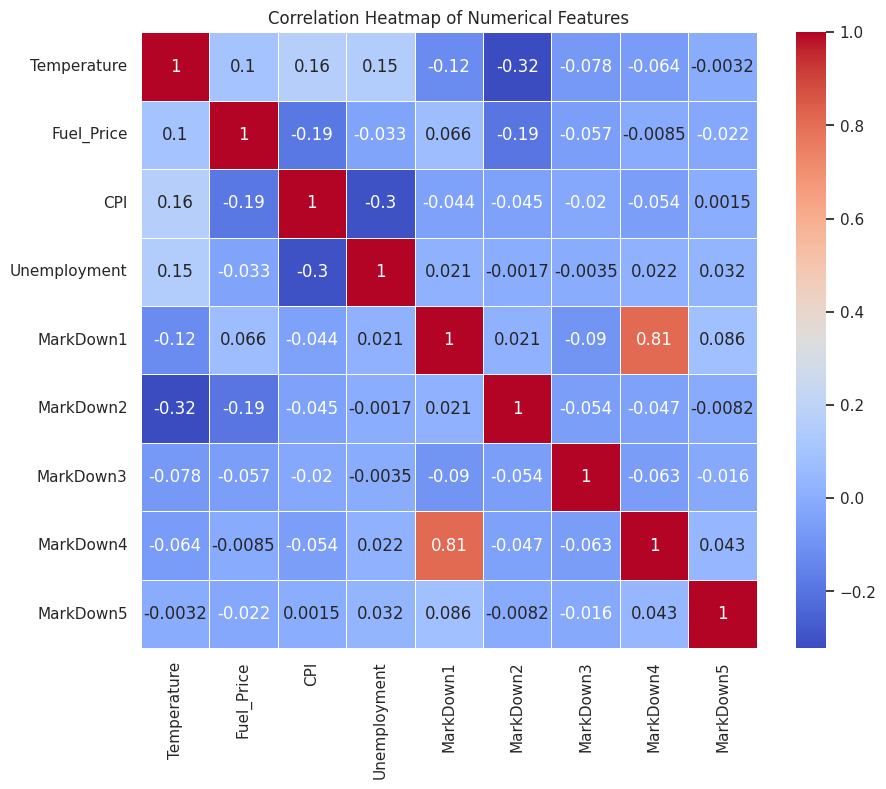

In [ ]:
# Task 8: Generate correlation heatmaps to identify relationships between numerical features.

# load data set
features_data = pd.read_csv('Features data set.csv')


# Selecting numerical columns for correlation analysis
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate the correlation matrix
correlation_matrix = features_data[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Explanation:**

**correlation_matrix:** Calculates the correlation values between each pair of numerical features.

**sns.heatmap:** Creates the heatmap with annotation (annot=True), color scheme (cmap='coolwarm'), and formatted for easy readability.

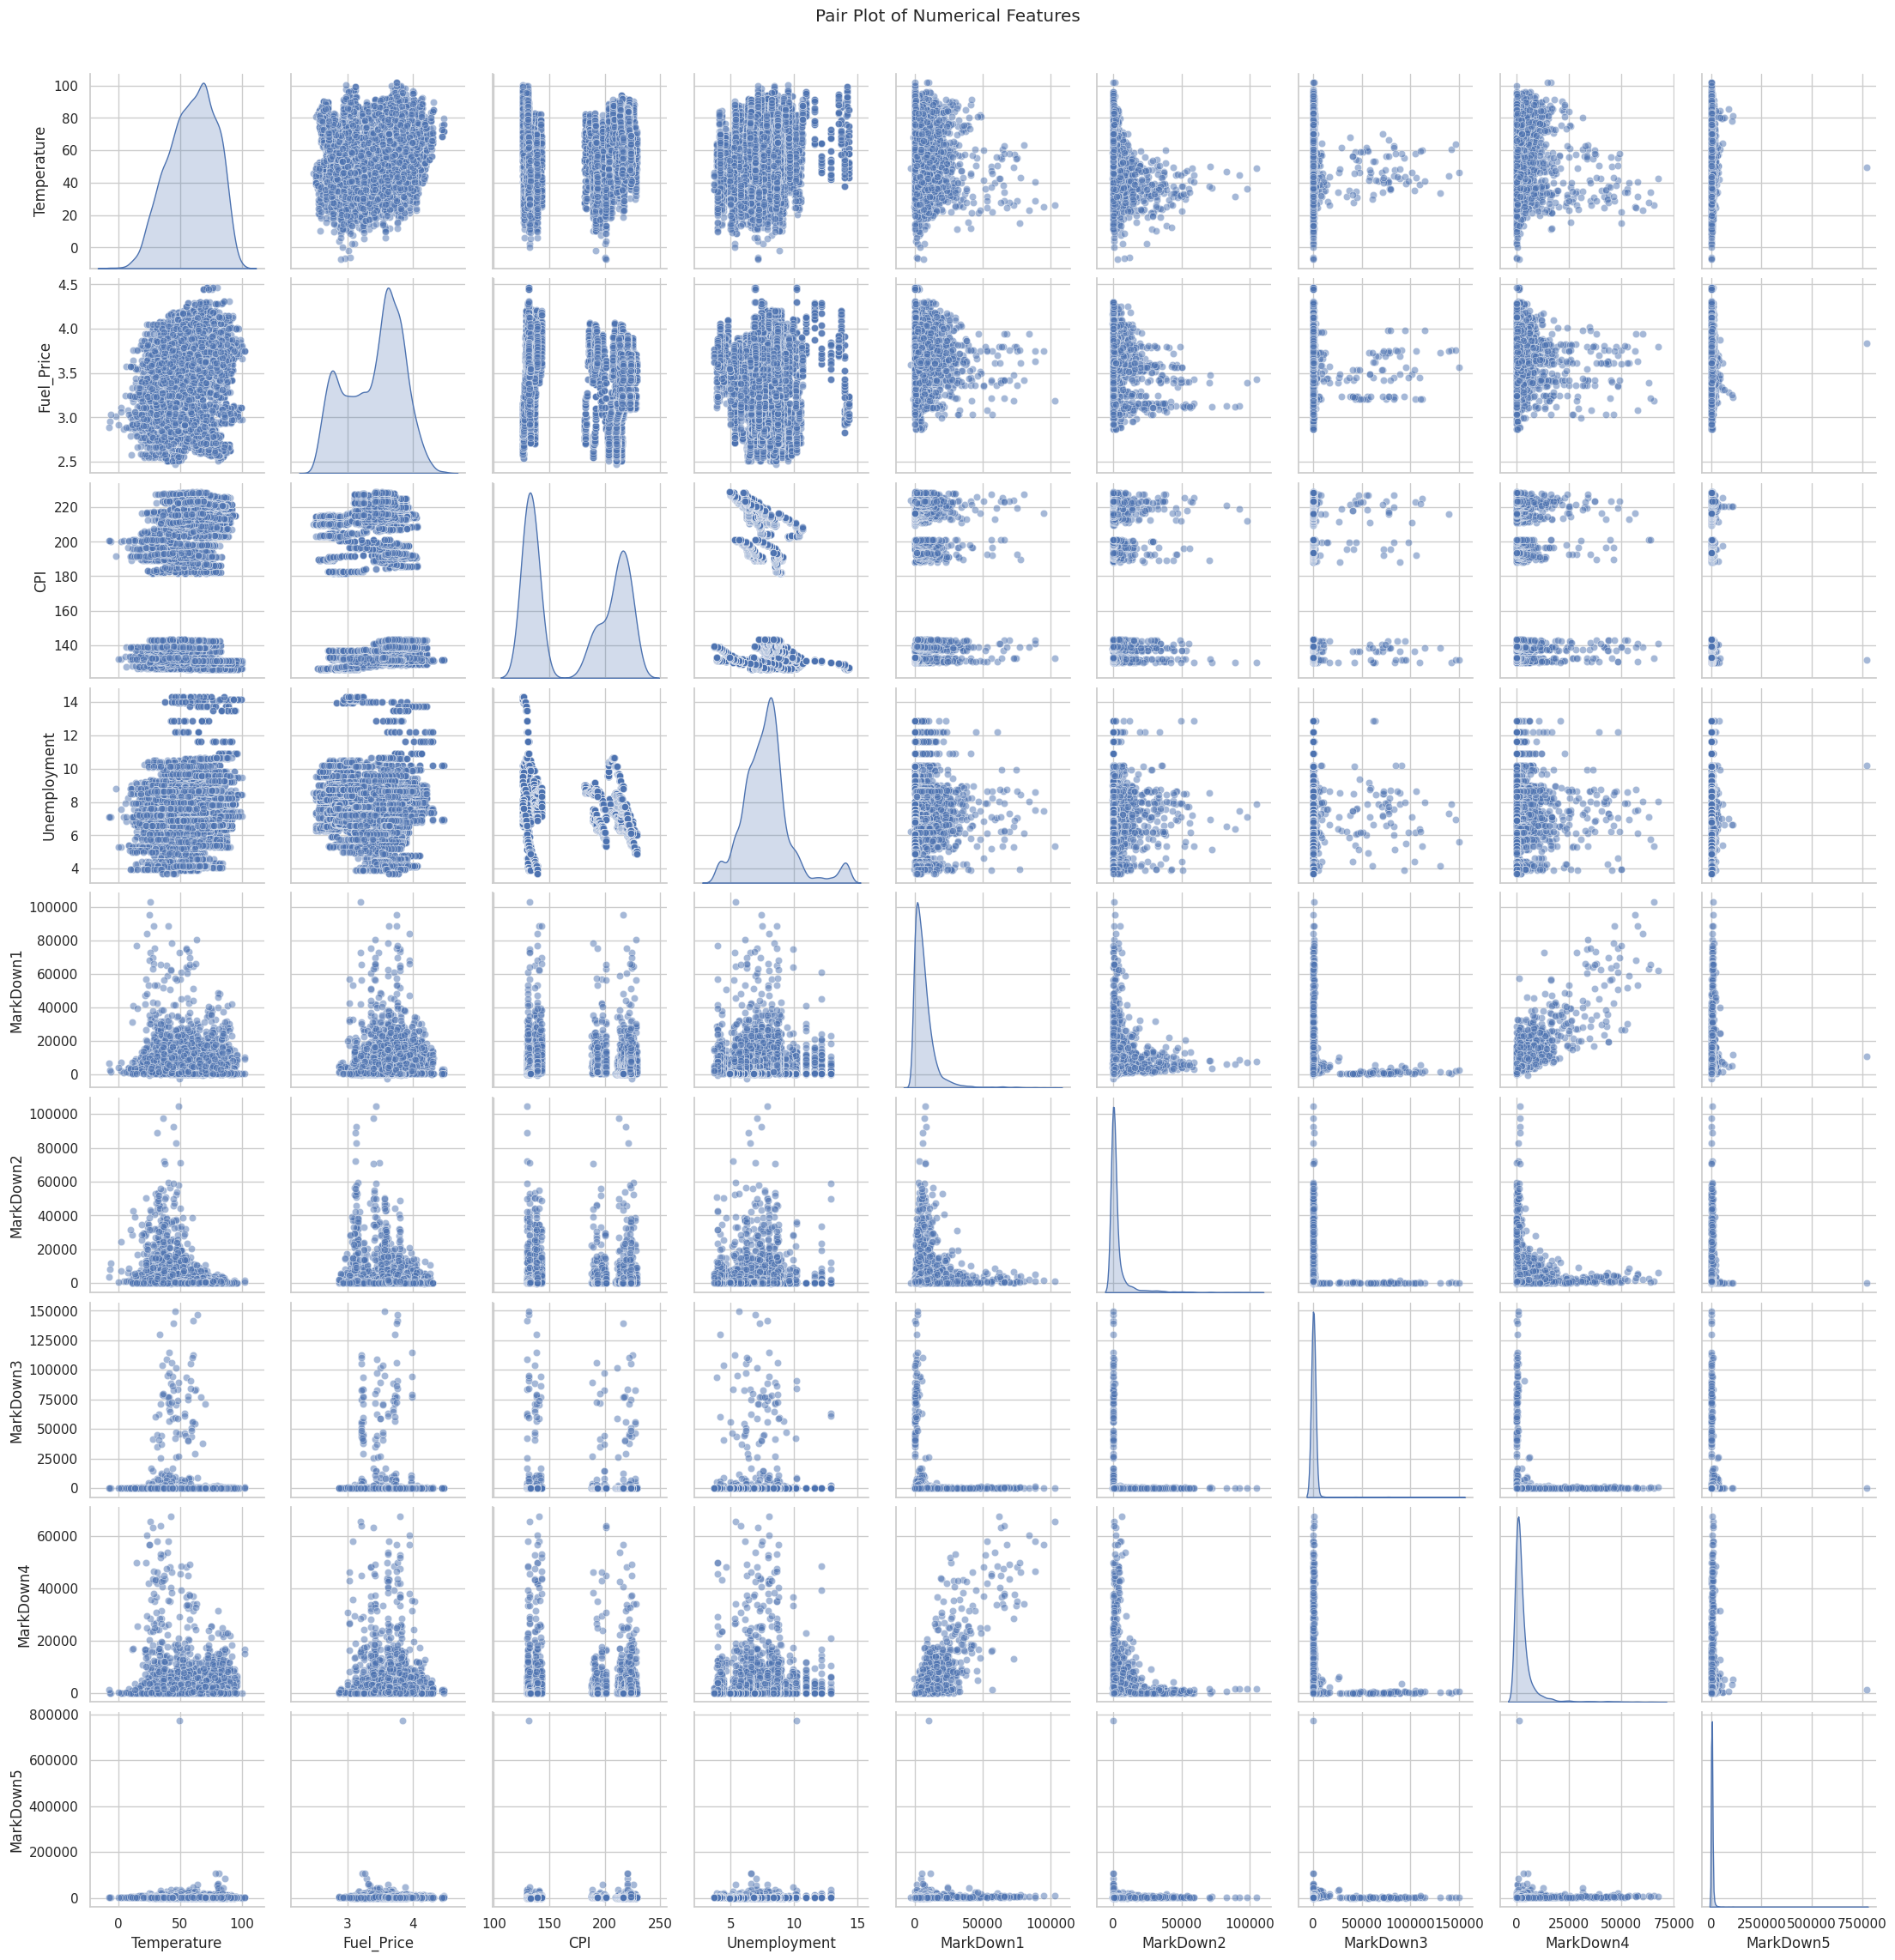

In [ ]:
# Task 9: Use pair plots to visualize relationships between features.

# Load the Features dataset
features_data = pd.read_csv('Features data set.csv')

# Selecting numerical columns for the pair plot
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Plotting pair plots
sns.pairplot(features_data[numerical_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)  # Adjust title position for readability
plt.show()


**Explanation:**

**sns.pairplot:** Creates scatter plots for each pair of features. diag_kind='kde' will plot the distribution (Kernel Density Estimate) on the diagonal, showing the distribution of individual features.

**plot_kws={'alpha':0.5}:** Adds transparency to scatter plots, making overlapping points easier to interpret.

# **3. Feature Engineering**

In [ ]:
# Task 10: Create new features that might be useful for the analysis (e.g., date-related features from timestamps, interaction terms).

# Load datasets
features_data = pd.read_csv('Features data set.csv')
sales_data = pd.read_csv('sales data-set.csv')

# Convert Date columns to datetime format
features_data['Date'] = pd.to_datetime(features_data['Date'], format='%d/%m/%Y')
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d/%m/%Y')

# 1. Date-Related Features
# Extracting Year, Month, Week, and Day from the Date column
features_data['Year'] = features_data['Date'].dt.year
features_data['Month'] = features_data['Date'].dt.month
features_data['Week'] = features_data['Date'].dt.isocalendar().week
features_data['Day'] = features_data['Date'].dt.day

# Weekend Indicator
features_data['IsWeekend'] = features_data['Date'].dt.weekday >= 5  # Saturday=5, Sunday=6

# 2. Interaction Terms
# Interaction between Fuel_Price and Unemployment
features_data['Fuel_Unemployment_Interaction'] = features_data['Fuel_Price'] * features_data['Unemployment']

# Display the first few rows to verify new features
print("Features dataset with new features:")
print(features_data.head())


Features dataset with new features:
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Year  Month  \
0        NaN        NaN  211.096358         8.106      False  2010      2   
1        NaN        NaN  211.242170         8.106       True  2010      2   
2        NaN        NaN  211.289143         8.106      False  2010      2   
3        NaN        NaN  211.319643         8.106      False  2010      2   
4        NaN        NaN  211.350143         8.106      False  2010      3   

   Week  Day  

**Explanation:**

**Date-Related Features:** Year, Month, Week, Day, and IsWeekend help capture seasonality, time trends, and weekend shopping behavior.

**Interaction Terms:** Fuel_Unemployment_Interaction combines Fuel_Price and Unemployment, potentially capturing how economic conditions impact consumer behavior.

In [ ]:
# Task 11: Standardize or normalize numerical features if needed.

from sklearn.preprocessing import StandardScaler

# Load Features dataset
features_data = pd.read_csv('Features data set.csv')

# List of numerical columns to standardize
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Standardize numerical features
scaler = StandardScaler()
features_data[numerical_features] = scaler.fit_transform(features_data[numerical_features])

# Display the first few rows to verify standardization
print("Standardized Features dataset:")
print(features_data.head())


Standardized Features dataset:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010    -0.912661   -1.933624        NaN        NaN   
1      1  12/02/2010    -1.116115   -1.989268        NaN        NaN   
2      1  19/02/2010    -1.040087   -2.068098        NaN        NaN   
3      1  26/02/2010    -0.681366   -1.959128        NaN        NaN   
4      1  05/03/2010    -0.688327   -1.810743        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  0.972312      0.148726      False  
1        NaN        NaN        NaN  0.975982      0.148726       True  
2        NaN        NaN        NaN  0.977164      0.148726      False  
3        NaN        NaN        NaN  0.977932      0.148726      False  
4        NaN        NaN        NaN  0.978699      0.148726      False  


**Explanation:**

**StandardScaler:** Scales each feature by removing the mean and scaling to unit variance.

**fit_transform:** Fits the scaler to the data and transforms it in one step.

# **4. Model Building**

In [ ]:
#  Task 12: Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

# Load datasets and merge them for analysis (ensure proper merging based on your project structure)
features_data = pd.read_csv('Features data set.csv')
sales_data = pd.read_csv('sales data-set.csv')

# Merge Features and Sales datasets on common columns (e.g., Store and Date)
# Convert Date columns to datetime format if needed
features_data['Date'] = pd.to_datetime(features_data['Date'], format='%d/%m/%Y')
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d/%m/%Y')

# Merge datasets on Store and Date for training
merged_data = pd.merge(sales_data, features_data, on=['Store', 'Date'])

# Define target variable (e.g., 'Weekly_Sales') and features
X = merged_data.drop(columns=['Weekly_Sales', 'Date'])  # Exclude target and date column
y = merged_data['Weekly_Sales']

# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes to verify the split
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training features shape: (337256, 13)
Testing features shape: (84314, 13)
Training labels shape: (337256,)
Testing labels shape: (84314,)


**Explanation:**

**Merge the Datasets:** Ensure the Features Dataset and Sales Dataset are properly merged on Store and Date.

**Define Features and Target:** Here, Weekly_Sales is the target variable, while the other columns are features.

**Split the Data:** train_test_split divides the data into training and testing sets with a 20% test size and a fixed random state for reproducibility.

In [ ]:
#  Task 13: Train a simple linear regression model (if the task is regression) or a logistic regression model (if the task is classification).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaN values
import pandas as pd # import pandas

# Load datasets and merge them for analysis
features_data = pd.read_csv('Features data set.csv')
sales_data = pd.read_csv('sales data-set.csv')

# Convert Date columns to datetime format
features_data['Date'] = pd.to_datetime(features_data['Date'], format='%d/%m/%Y')
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d/%m/%Y')

# Merge Features and Sales datasets on Store and Date
merged_data = pd.merge(sales_data, features_data, on=['Store', 'Date'])

# Define target variable and features
X = merged_data.drop(columns=['Weekly_Sales', 'Date'])  # Drop target and date column
y = merged_data['Weekly_Sales']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer object with strategy='mean'
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data using the trained imputer


# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error (MSE): 501476343.2621692
R-squared (R2 Score): 0.0383427839490148


# **Explanation:**
**1.Linear Regression:** We initialize the LinearRegression model and fit it to the training data.

**2.Evaluation:**

**Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.

**R-squared (R2 Score):** Indicates the proportion of variance in the target explained by the model (1 = perfect fit).

In [ ]:
# Task 14: Evaluate the model performance using appropriate metrics (e.g., RMSE for regression, accuracy/F1-score for classification).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Load datasets and merge them for analysis
features_data = pd.read_csv('Features data set.csv')
sales_data = pd.read_csv('sales data-set.csv')

# RMSE for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Output the results
print(f"Root Mean Squared Error (RMSE): {rmse}")

# accuracy/F1-score for classification
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")



Root Mean Squared Error (RMSE): 22393.66748128071
Accuracy: 0.0383427839490148


**Explaination:-**
To evaluate model performance, use RMSE (Root Mean Square Error) for regression to measure prediction accuracy, and accuracy or F1 score for classification tasks to assess correct predictions and balance between precision and recall.

In [3]:
# Task 15: Experiment with at least two other algorithms (e.g., decision tree, random forest, k-nearest neighbors) and compare their performance.

